## Importación de librerias para descarga de tweets

In [1]:
import tweepy
from login_keys import consumer_key ,consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

## Descargo 100 tweets de mi TL

In [2]:
public_tweets = api.home_timeline(count=100)

## Curación de tweets

In [3]:
import re

filtered_text = ""
for tweet in public_tweets:
    print(tweet.text)
    filtered_text += re.sub(r"http\S+", "", tweet.text,)

Allanaron el Instituto Próvolo de La Plata por denuncias de abusos https://t.co/zDbO9MjFAJ https://t.co/EEXpXynt1E
Haciéndote honor @yanilatorre 💚💚💚 https://t.co/6qBA0Rc3VM
#Rating PRIMETIME 

#Showmatch: 16.3
#100DiasParaEnamorarse: 11.6
Meghan Markle y Kate Middleton tienen prohibido usar esta joya de día
https://t.co/OaoMJbO8hi
Homenajearon a los argentinos que combatieron contra los nazis en la Segunda Guerra Mundial | Por Walter Darío Vázq… https://t.co/KFwEofNl3Y
DATOS 23:00 HS - TEMP 19°C - HR 50% - PRESION 965.9HPA - VIENTO DEL SUDOESTE 13KM - DESPEJADO - VISIBILIDAD 10 KM.
Caída del PBI de 2,3% e inflación de 41,4%, las proyecciones de Morgan Stanley para la economía argentina… https://t.co/kEqqVldoey
[PENALES]
Talleres y Central empataron sin goles en la cancha de Lanús por la Copa Argentina.
Definen desde los doc… https://t.co/UihO7mjYwf
Precios Cuidados: se suman 127 productos nuevos y se adhieren los supermercados chinos https://t.co/0A6AQDd2i4 https://t.co/3us8rCHvmR
RT @

In [4]:
filtered_text = re.sub(r"http\S+", "", filtered_text)
filtered_text = filtered_text.replace("RT ","  ")

In [5]:
filtered_text

'Allanaron el Instituto Próvolo de La Plata por denuncias de abusos  Haciéndote honor @yanilatorre 💚💚💚 #Rating PRIMETIME \n\n#Showmatch: 16.3\n#100DiasParaEnamorarse: 11.6Meghan Markle y Kate Middleton tienen prohibido usar esta joya de día\nHomenajearon a los argentinos que combatieron contra los nazis en la Segunda Guerra Mundial | Por Walter Darío Vázq… DATOS 23:00 HS - TEMP 19°C - HR 50% - PRESION 965.9HPA - VIENTO DEL SUDOESTE 13KM - DESPEJADO - VISIBILIDAD 10 KM.Caída del PBI de 2,3% e inflación de 41,4%, las proyecciones de Morgan Stanley para la economía argentina… [PENALES]\nTalleres y Central empataron sin goles en la cancha de Lanús por la Copa Argentina.\nDefinen desde los doc… Precios Cuidados: se suman 127 productos nuevos y se adhieren los supermercados chinos    @mauricoccolo: Talleres jugó 22 definiciones por penales en toda su historia por torneos de AFA: ganó 11 y perdió 11.\n\nLas últimas cinco…La carta de renuncia de Mario Quintana: una afectuosa despedida a Macri,

In [6]:
# lower to get better comparison
filtered_text = filtered_text.lower()

filtered_text.replace("@", " @")
filtered_text = " ".join(filter(lambda x:x[0]!='#', filtered_text.split()))
filtered_text = " ".join(filter(lambda x:x[0]!='@', filtered_text.split()))
# filtered_text = ' '.join([word for word in filtered_text.split() if not word.startswith('@')])

In [7]:
filtered_text

'allanaron el instituto próvolo de la plata por denuncias de abusos haciéndote honor 💚💚💚 primetime 16.3 11.6meghan markle y kate middleton tienen prohibido usar esta joya de día homenajearon a los argentinos que combatieron contra los nazis en la segunda guerra mundial | por walter darío vázq… datos 23:00 hs - temp 19°c - hr 50% - presion 965.9hpa - viento del sudoeste 13km - despejado - visibilidad 10 km.caída del pbi de 2,3% e inflación de 41,4%, las proyecciones de morgan stanley para la economía argentina… [penales] talleres y central empataron sin goles en la cancha de lanús por la copa argentina. definen desde los doc… precios cuidados: se suman 127 productos nuevos y se adhieren los supermercados chinos talleres jugó 22 definiciones por penales en toda su historia por torneos de afa: ganó 11 y perdió 11. las últimas cinco…la carta de renuncia de mario quintana: una afectuosa despedida a macri, con citas de gandhi el candidato fue sometido a cirugía luego del ataque. el presente 

In [8]:
from string import punctuation
filtered_text.replace(punctuation, " ")

'allanaron el instituto próvolo de la plata por denuncias de abusos haciéndote honor 💚💚💚 primetime 16.3 11.6meghan markle y kate middleton tienen prohibido usar esta joya de día homenajearon a los argentinos que combatieron contra los nazis en la segunda guerra mundial | por walter darío vázq… datos 23:00 hs - temp 19°c - hr 50% - presion 965.9hpa - viento del sudoeste 13km - despejado - visibilidad 10 km.caída del pbi de 2,3% e inflación de 41,4%, las proyecciones de morgan stanley para la economía argentina… [penales] talleres y central empataron sin goles en la cancha de lanús por la copa argentina. definen desde los doc… precios cuidados: se suman 127 productos nuevos y se adhieren los supermercados chinos talleres jugó 22 definiciones por penales en toda su historia por torneos de afa: ganó 11 y perdió 11. las últimas cinco…la carta de renuncia de mario quintana: una afectuosa despedida a macri, con citas de gandhi el candidato fue sometido a cirugía luego del ataque. el presente 

In [9]:
from os import path
d = path.dirname(".")
stop_words = open(path.join(d, 'spanish.txt'), encoding="utf8").read()

In [10]:
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + "\'¿¡"

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])

In [11]:
filtered_text

'allanaron instituto próvolo plata denuncias abusos haciéndote honor 💚💚💚 primetime 163 116meghan markle kate middleton prohibido usar joya día homenajearon argentinos combatieron nazis segunda guerra mundial walter darío vázq… datos 2300 hs temp 19°c hr 50 presion 9659hpa viento sudoeste 13km despejado visibilidad 10 kmcaída pbi 23 inflación 414 proyecciones morgan stanley economía argentina… penales talleres central empataron goles cancha lanús copa argentina definen doc… precios cuidados suman 127 productos nuevos adhieren supermercados chinos talleres jugó 22 definiciones penales toda historia torneos afa ganó 11 perdió 11 últimas cinco…la carta renuncia mario quintana afectuosa despedida macri citas gandhi candidato sometido cirugía luego ataque presente lucas acosta cortocircuito pérez cambié página ernesto clarens aseguró llevaba bolsos dólares casa kirchner omar lavieri… última llamada familia hizo modelo hallada muerta lujoso yate grecia horóscopo correspondiente viernes 7 sept

## Analisis de palabras mas frecuentes

In [12]:
from collections import Counter
Counter(filtered_text.split()).most_common()[:20]

[('primetime', 5),
 ('mundial', 5),
 ('día', 4),
 ('años', 4),
 ('abusos', 3),
 ('10', 3),
 ('23', 3),
 ('inflación', 3),
 ('talleres', 3),
 ('argentina', 3),
 ('precios', 3),
 ('clarens', 3),
 ('bolsos', 3),
 ('dólares', 3),
 ('viernes', 3),
 ('septiembre', 3),
 ('york', 3),
 ('jair', 3),
 ('bolsonaro', 3),
 ('volvió', 3)]

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

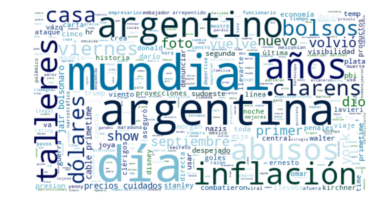

In [14]:
wordcloud = WordCloud(width=550,height=300,max_font_size=80,background_color="white",max_words=350,colormap="ocean").generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

## Modelo de recomendación de tweets basado en contenido

## Armo array de tweets

In [32]:
twits = []
for tweet in public_tweets:
    print(tweet.text)
    twits.append(re.sub(r"http\S+", "", tweet.text,))

Allanaron el Instituto Próvolo de La Plata por denuncias de abusos https://t.co/zDbO9MjFAJ https://t.co/EEXpXynt1E
Haciéndote honor @yanilatorre 💚💚💚 https://t.co/6qBA0Rc3VM
#Rating PRIMETIME 

#Showmatch: 16.3
#100DiasParaEnamorarse: 11.6
Meghan Markle y Kate Middleton tienen prohibido usar esta joya de día
https://t.co/OaoMJbO8hi
Homenajearon a los argentinos que combatieron contra los nazis en la Segunda Guerra Mundial | Por Walter Darío Vázq… https://t.co/KFwEofNl3Y
DATOS 23:00 HS - TEMP 19°C - HR 50% - PRESION 965.9HPA - VIENTO DEL SUDOESTE 13KM - DESPEJADO - VISIBILIDAD 10 KM.
Caída del PBI de 2,3% e inflación de 41,4%, las proyecciones de Morgan Stanley para la economía argentina… https://t.co/kEqqVldoey
[PENALES]
Talleres y Central empataron sin goles en la cancha de Lanús por la Copa Argentina.
Definen desde los doc… https://t.co/UihO7mjYwf
Precios Cuidados: se suman 127 productos nuevos y se adhieren los supermercados chinos https://t.co/0A6AQDd2i4 https://t.co/3us8rCHvmR
RT @

## Vectorización de tweets con tfidf

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, )
tfidf_matrix = tf.fit_transform(twits)
tfidf_matrix.shape

(99, 1877)

### Genero matriz de similaridad

In [34]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.0295162 , 0.01380723,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0295162 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.01562562],
       [0.01380723, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01562562, 0.        ,
        1.        ]])

In [35]:
len(public_tweets)

99

## Evaluación de modelo de comendación

Elijo un tweet a partir del cual obtener tweets recomendados

In [36]:
public_tweets[5].text

'DATOS 23:00 HS - TEMP 19°C - HR 50% - PRESION 965.9HPA - VIENTO DEL SUDOESTE 13KM - DESPEJADO - VISIBILIDAD 10 KM.'

In [47]:
# Función para obtener recomendaciones, busca en la matriz de similaridad elementos mas parecidos al elemento idx y retorna n mejores recomendaciones
def get_recommendations(idx, n):    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Descarto primer elemento ya que coincide con el elemento idx
    sim_scores = sim_scores[1:n]
    recommend_index = [i[0] for i in sim_scores]
    return recommend_index

In [50]:
get_recommendations(5,5)


[74, 72, 78, 45]

Muestro los tweets recomendados

In [55]:
print(public_tweets[74].text)
print(public_tweets[72].text)
print(public_tweets[78].text)
print(public_tweets[45].text)


DATOS 22:00 HS - TEMP 19.6°C - HR 49% - PRESION 965.1HPA - VIENTO DEL SUDOESTE 10KM - DESPEJADO - VISIBILIDAD 10 KM.
#Rating PRIMETIME 

#MiHermanoEsUnClon: 13.2
#100DiasParaEnamorarse: 10.0
“No entiendo por qué…” Romero Polémico por la ausencia de la camiseta 10 en la Selección https://t.co/i4WKY9Bel0
Luis Naidenoff: "Milani es el emblema del espionaje ilegal. Te tiraban el aparato del Estado encima. Es importante… https://t.co/Td7mihDezM


Se puede ver que el sistema de recomendación funciona correctamente, el primer elemento retornado es un tweet similar previo, al elemento ingresado.
Los demas tweets si bien no corresponden al mismo tema del tweet ingresado son tweets informativos y con números en su contenido y caracteres similares.